In [11]:
import pandas as pd
import numpy as np


from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

from sklearn import preprocessing, neighbors


In [2]:
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
df_new = pd.read_csv("../Data/BMT_balanced_encoded_address.csv",index_col= 0)

In [51]:
df_new.describe()

,address,year,day,length,weight,count,looped,neighbors,income,label,length_t,weight_t,count_t,looped_t,neighbors_t,income_t
count,82826.000000,82826.000000,82826.000000,82826.000000,8.282600e+04,82826.000000,82826.000000,82826.000000,8.282600e+04,82826.000000,8.282600e+04,8.282600e+04,8.282600e+04,8.282600e+04,8.282600e+04,8.282600e+04
mean,30610.651861,2014.673001,178.385121,42.892232,6.068181e-01,658.708316,167.566960,2.245189,2.299863e+09,0.500000,7.907695e-15,-9.215578e-15,2.649182e-15,-2.283879e-14,1.087646e-14,-7.532922e-14
std,17711.101329,1.883032,99.762367,58.575369,6.925135e+00,1566.799238,781.278102,41.365659,5.160580e+10,0.500003,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00
min,0.000000,2011.000000,1.000000,0.000000,6.493017e-80,1.000000,0.000000,1.000000,3.000000e+07,0.000000,-1.301079e+00,-1.245293e+00,-7.386517e-01,-3.720718e-01,-1.255511e+00,-1.868294e+00
25%,15069.250000,2013.000000,91.000000,2.000000,3.571429e-02,1.000000,0.000000,1.000000,8.000000e+07,0.000000,-6.477988e-01,-1.060596e+00,-7.386517e-01,-3.720718e-01,-1.255511e+00,-6.942477e-01
50%,30775.500000,2015.000000,169.000000,8.000000,3.146329e-01,1.000000,0.000000,2.000000,1.584871e+08,0.500000,-3.707359e-02,-2.491646e-02,-7.386517e-01,-3.720718e-01,4.903861e-01,-6.348627e-02
75%,46146.000000,2016.000000,266.000000,90.000000,1.000000e+00,38.000000,0.000000,2.000000,5.000000e+08,1.000000,1.122097e+00,1.121375e+00,1.087352e+00,-3.720718e-01,4.903861e-01,7.368739e-01
max,61950.000000,2018.000000,365.000000,144.000000,1.866717e+03,14494.000000,13833.000000,11746.000000,1.067816e+13,1.000000,1.336270e+00,2.502569e+00,1.720990e+00,2.904817e+00,3.060208e+00,2.519937e+00


In [6]:
df_new.drop(columns=["length","weight","count","looped","neighbors","income"], inplace=True)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df_new.drop(columns=['label']), df_new['label'], 
                                                    test_size = 0.33, random_state=42)


In [54]:
classifier = SGDClassifier(loss='log', max_iter=100) 
model = classifier.fit(X_train, y_train)
y_pred = model.predict(X_test)

/Users/muntaha/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [55]:
accuracy = accuracy_score(y_test,y_pred)
conf_mat = confusion_matrix(y_test,y_pred)
print("The accuracy of the model is :", round(accuracy,2)*100,"%")
print("Confusion Matrix:\n", conf_mat)

The accuracy of the model is : 50.0 %
Confusion Matrix:
 [[   13 13647]
 [    2 13671]]


In [56]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average='binary')
print('Precision = ',round(precision,4),'\nRecall = ', round(recall,4), '\nF-Score = ',round(fscore,4))

Precision =  0.5004 
Recall =  0.9999 
F-Score =  0.667


In [57]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


In [58]:
classifier = SGDClassifier(loss='log', max_iter=100) 
model = classifier.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [59]:
accuracy = accuracy_score(y_test,y_pred)
conf_mat = confusion_matrix(y_test,y_pred)
print("The accuracy of the model is :", round(accuracy,2)*100,"%")
print("Confusion Matrix:\n", conf_mat)

The accuracy of the model is : 57.99999999999999 %
Confusion Matrix:
 [[8170 5490]
 [6032 7641]]


In [60]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average='binary')
print('Precision = ',round(precision,4),'\nRecall = ', round(recall,4), '\nF-Score = ',round(fscore,4))

Precision =  0.5819 
Recall =  0.5588 
F-Score =  0.5701


In [61]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


In [62]:
classifier = SGDClassifier(loss='log', max_iter=100) 
model = classifier.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [63]:
accuracy = accuracy_score(y_test,y_pred)
conf_mat = confusion_matrix(y_test,y_pred)
print("The accuracy of the model is :", round(accuracy,2)*100,"%")
print("Confusion Matrix:\n", conf_mat)

The accuracy of the model is : 57.99999999999999 %
Confusion Matrix:
 [[8113 5547]
 [6030 7643]]


In [64]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average='binary')
print('Precision = ',round(precision,4),'\nRecall = ', round(recall,4), '\nF-Score = ',round(fscore,4))

Precision =  0.5795 
Recall =  0.559 
F-Score =  0.569


### SVM model

In [17]:
# Scale
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [19]:
# work on Balanced DATA (Random sampling)
model = SVC(kernel='rbf', random_state = 2)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
Y_pred

In [ ]:
cm = confusion_matrix(y_test,Y_pred)
accuracy = float(cm.diagonal().sum())/len(y_test)
print("\nSVM Accuracy: ", accuracy)

In [ ]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test, Y_pred, average='binary')
print('Precision = ',round(precision,4),'\nRecall = ', round(recall,4), '\nF-Score = ',round(fscore,4))

In [ ]:
model = model.fit(X_train_scaled, y_train)
y_pred_ = model.predict(X_test_scaled)

In [ ]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_, average='binary')
print('Precision = ',round(precision,4),'\nRecall = ', round(recall,4), '\nF-Score = ',round(fscore,4))

In [ ]:
cm = confusion_matrix(y_test,y_pred_)
accuracy = float(cm.diagonal().sum())/len(y_test)
print("\nSVM Accuracy: ", accuracy)

In [ ]:
accuracy = accuracy_score(y_test,y_pred_)
conf_mat = confusion_matrix(y_test,y_pred_)
print("The accuracy of the model is :", round(accuracy,2)*100,"%")
print("Confusion Matrix:\n", conf_mat)

In [ ]:
model.score(X_test,y_test)

### Random Forest model

In [17]:
# work on Balanced DATA (Random sampling)
model = RandomForestClassifier(max_depth=3,random_state=2)

In [19]:
model = model.fit(X_train,y_train)

In [20]:
model.score(X_test,y_test)

0.7459796204182161

In [21]:
Y_pred = model.predict(X_test)

In [22]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test, Y_pred, average='binary')
print('Precision = ',round(precision,4),'\nRecall = ', round(recall,4), '\nF-Score = ',round(fscore,4))

Precision =  0.6946 
Recall =  0.8791 
F-Score =  0.7761


### Try the model with transformed data 

In [22]:
model = RandomForestClassifier(max_depth=5,random_state=42)
model = model.fit(X_train,y_train)
print(model.score(X_test,y_test))
Y_pred = model.predict(X_test)
precision, recall, fscore, support = precision_recall_fscore_support(y_test, Y_pred, average='binary')
print('Precision = ',round(precision,4),'\nRecall = ', round(recall,4), '\nF-Score = ',round(fscore,4))

0.7630269957019366
Precision =  0.7181 
Recall =  0.8671 
F-Score =  0.7856


# Gradient boosted tree

In [4]:
model = GradientBoostingClassifier()
model = model.fit(X_train,y_train)

print(model.score(X_test,y_test))

Y_pred = model.predict(X_test)


NameError: name 'X_train' is not defined

In [ ]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test, Y_pred, average='binary')
print('Precision = ',round(precision,4),'\nRecall = ', round(recall,4), '\nF-Score = ',round(fscore,4))


In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred, target_names=['0','1'], zero_division=0))

              precision    recall  f1-score   support

           0       0.89      0.79      0.83     13660
           1       0.81      0.90      0.85     13673

    accuracy                           0.84     27333
   macro avg       0.85      0.84      0.84     27333
weighted avg       0.85      0.84      0.84     27333



In [68]:
# Scale MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [69]:
model = model.fit(X_train_scaled, y_train)
y_pred_ = model.predict(X_test_scaled)

In [70]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_, average='binary')
print('Precision = ',round(precision,4),'\nRecall = ', round(recall,4), '\nF-Score = ',round(fscore,4))

Precision =  0.8137 
Recall =  0.8948 
F-Score =  0.8523


In [71]:
# standared
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [72]:
model = model.fit(X_train_scaled, y_train)
y_pred_ = model.predict(X_test_scaled)

In [73]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_, average='binary')
print('Precision = ',round(precision,4),'\nRecall = ', round(recall,4), '\nF-Score = ',round(fscore,4))

Precision =  0.8068 
Recall =  0.8912 
F-Score =  0.8469


## naive bayes

In [74]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

precision, recall, fscore, support = precision_recall_fscore_support(y_test, Y_pred, average='binary')
print('Precision = ',round(precision,4),'\nRecall = ', round(recall,4), '\nF-Score = ',round(fscore,4))


Precision =  0.8089 
Recall =  0.9008 
F-Score =  0.8524


## XGBOOST

In [33]:
from xgboost import XGBClassifier

df = pd.read_csv(r"C:\Users\elaaf\Desktop\SDS\extra\data_undersampled_scaled_tranformed_v1.csv",index_col= 0)
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['label']), df['label'], 
                                                    test_size = 0.33, random_state=42, stratify=df['label'])


#Create an object of the classifier.
clf = XGBClassifier(use_label_encoder=False ).fit(X_train, y_train)



C:\Users\elaaf\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


[16:43:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [34]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {round(accuracy, 4)*100}')

Model Accuracy: 98.99


In [35]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average='binary')
print('Precision = ',round(precision,4),'\nRecall = ', round(recall,4), '\nF-Score = ',round(fscore,4))


Precision =  0.868 
Recall =  0.3618 
F-Score =  0.5108


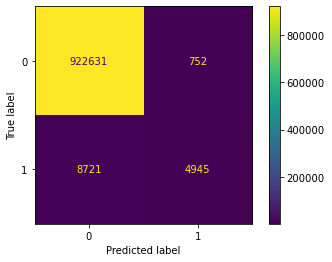

In [36]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test);

# All Models

In [ ]:
# Create Function to fit on All models and Calculat it's score, F1, Prec, Recall ... etc. 

# Test with new Data

In [37]:
df_test = pd.read_csv("../Data/BMT_balanced_encoded_address_RobustScaler_Test.csv",index_col= 0)

In [38]:
df_test

,address,year,day,label,s_length,s_weight,s_counted,s_income,s_looped,s_neighbors
0,0,2017,11,1,0.113636,-0.317644,0.000000,-0.139136,-0.214479,-0.005927
1,5,2016,132,1,0.409091,-0.326033,0.000000,-0.139255,-0.214479,-0.030102
2,6,2016,246,1,-0.090909,0.710751,0.000000,0.098840,-0.214479,-0.005927
3,8,2016,322,1,0.727273,-0.322235,0.000000,-0.207826,-0.214479,-0.005927
4,9,2016,238,1,1.545455,-0.250739,12.297297,0.098840,-0.214479,-0.030102
...,...,...,...,...,...,...,...,...,...,...
2724847,5214,2018,139,0,-0.090909,0.710751,0.000000,-0.005709,-0.214479,-0.030102
1994617,20804,2016,138,0,-0.068182,-0.067027,0.000000,0.848793,-0.214479,-0.005927
635147,21980,2012,239,0,1.454545,-0.196656,35.783784,-0.196867,1.481470,-0.030102
350738,46995,2011,320,0,-0.045455,-0.196656,0.000000,12.250906,-0.214479,-0.005927


In [40]:
X_train, X_test, y_train, y_test = train_test_split(df_test.drop(columns=['label','address']), df_test['label'], 
                                                    test_size = 0.25, random_state=42)